In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
#Import data set from files
employment=pd.read_csv('Employment - City - Weekly.csv')
geoIDs=pd.read_csv('GeoIDs - City.csv')
mobility=pd.read_csv('Google Mobility - City - Daily.csv')
covid=pd.read_csv('COVID - City - Daily.csv') 
consumer_spending=pd.read_csv('Affinity - City - Daily.csv') 
econ_small_bussiness=pd.read_csv('Womply - City - Weekly.csv') 


In [3]:
#reformat the employment dataset
employment=employment.rename(columns={"day_endofweek": "day"})
employment = employment.drop(employment[employment.cityid == 45].index)
employment['emp']=[float(emp) for emp in employment['emp']]
employment['date'] = pd.to_datetime(employment[['year', 'month', 'day']])
employment=employment.drop(columns=['year','month', 'day'])
employment

,cityid,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,emp_incabovemed,date
0,1,0.00228,.000506,.00154,.00356,.00251,.00238,.00139,.00307,2020-01-17
1,2,0.00120,-.0033,-.00183,.00556,.000793,.00189,-.00209,.00303,2020-01-17
2,3,0.00211,.00321,.00155,.00344,.000749,.00242,.00211,.00211,2020-01-17
3,4,0.00133,-.000504,-.0058,.0108,.000674,.00245,-.00328,.00617,2020-01-17
4,5,-0.00202,.000567,-.00826,.00483,-.00328,-.0025,-.00495,.00149,2020-01-17
...,...,...,...,...,...,...,...,...,...,...
9906,49,-0.01490,-.131,-.0341,.0732,.,.00504,-.0677,.,2023-08-11
9907,50,-0.10500,-.36,-.0351,.0081,.,-.0169,-.141,.,2023-08-11
9908,51,-0.16000,-.133,-.156,-.226,.,-.188,-.146,.,2023-08-11
9909,52,-0.21900,-.19,-.317,-.16,.,-.245,-.265,.,2023-08-11


In [4]:
#Combine employment dataset and the geoId on the cityId
employment_geoId=employment.merge(geoIDs, left_on=['cityid'], right_on = ['cityid'])
employment_geoId.sort_values(by=['city_pop2019'], ascending=False)
employment_geoId

,cityid,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,emp_incabovemed,date,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
0,1,0.002280,.000506,.00154,.00356,.00251,.00238,.00139,.00307,2020-01-17,Los Angeles,CA,California,6,34.05,-118.24,10039107
1,1,0.001550,-.00992,.00411,.00233,-.000303,.00337,.00206,.0011,2020-01-24,Los Angeles,CA,California,6,34.05,-118.24,10039107
2,1,0.000917,-.016,.00506,.00166,-.00196,.00365,.00199,-.0000295,2020-01-31,Los Angeles,CA,California,6,34.05,-118.24,10039107
3,1,0.001680,-.0283,.00693,.00376,-.000899,.00562,.00179,.00159,2020-02-07,Los Angeles,CA,California,6,34.05,-118.24,10039107
4,1,0.002630,-.0373,.00559,.00767,.00312,.00645,-.00068,.00555,2020-02-14,Los Angeles,CA,California,6,34.05,-118.24,10039107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,53,-0.085700,-.114,-.0986,-.0934,.,-.0961,-.106,.,2023-07-14,Tulsa,OK,Oklahoma,40,36.15,-95.99,651552
9720,53,-0.081900,-.104,-.0928,-.0798,.,-.0865,-.0977,.,2023-07-21,Tulsa,OK,Oklahoma,40,36.15,-95.99,651552
9721,53,-0.080900,-.0965,-.0931,-.0708,.,-.0824,-.0947,.,2023-07-28,Tulsa,OK,Oklahoma,40,36.15,-95.99,651552
9722,53,-0.087000,-.104,-.0969,-.0739,.,-.0859,-.1,.,2023-08-04,Tulsa,OK,Oklahoma,40,36.15,-95.99,651552


In [5]:
#Select row from dataset with popultion over 5 million
employment_geoId_pol_lar=employment_geoId.loc[employment_geoId.city_pop2019>5000000]
employment_geoId_pol_lar

,cityid,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,emp_incabovemed,date,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
0,1,0.002280,.000506,.00154,.00356,.00251,.00238,.00139,.00307,2020-01-17,Los Angeles,CA,California,6,34.05,-118.24,10039107
1,1,0.001550,-.00992,.00411,.00233,-.000303,.00337,.00206,.0011,2020-01-24,Los Angeles,CA,California,6,34.05,-118.24,10039107
2,1,0.000917,-.016,.00506,.00166,-.00196,.00365,.00199,-.0000295,2020-01-31,Los Angeles,CA,California,6,34.05,-118.24,10039107
3,1,0.001680,-.0283,.00693,.00376,-.000899,.00562,.00179,.00159,2020-02-07,Los Angeles,CA,California,6,34.05,-118.24,10039107
4,1,0.002630,-.0373,.00559,.00767,.00312,.00645,-.00068,.00555,2020-02-14,Los Angeles,CA,California,6,34.05,-118.24,10039107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,3,-0.186000,-.401,-.106,-.165,.,-.133,-.206,.,2023-07-14,Chicago,IL,Illinois,17,41.88,-87.63,5150233
557,3,-0.183000,-.396,-.102,-.155,.,-.126,-.201,.,2023-07-21,Chicago,IL,Illinois,17,41.88,-87.63,5150233
558,3,-0.178000,-.393,-.0861,-.152,.,-.116,-.19,.,2023-07-28,Chicago,IL,Illinois,17,41.88,-87.63,5150233
559,3,-0.179000,-.401,-.0838,-.15,.,-.114,-.191,.,2023-08-04,Chicago,IL,Illinois,17,41.88,-87.63,5150233


In [6]:
#Calculate the mean value by date for the big city(population > 5m)
large_city_employment_rate_change=employment_geoId_pol_lar.groupby(['date'])['emp'].mean().reset_index()
large_city_employment_rate_change

,date,emp
0,2020-01-17,0.001863
1,2020-01-24,0.000073
2,2020-01-31,-0.000636
3,2020-02-07,0.000183
4,2020-02-14,0.000463
...,...,...
182,2023-07-14,-0.181667
183,2023-07-21,-0.181667
184,2023-07-28,-0.181667
185,2023-08-04,-0.187667


In [7]:
#Select row from dataset with popultion less than half million
employment_geoId_pol_sml=employment_geoId.loc[employment_geoId.city_pop2019<500000]
employment_geoId_pol_sml

,cityid,emp,emp_incq1,emp_incq2,emp_incq3,emp_incq4,emp_incmiddle,emp_incbelowmed,emp_incabovemed,date,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
8041,44,0.000259,-.00671,.0126,-.000385,-.00433,.00637,.00183,-.00201,2020-01-17,New Orleans,LA,Louisiana,22,29.95,-90.07,390144
8042,44,0.000482,.0143,-.0166,.00309,-.00396,-.00712,.000685,.000189,2020-01-24,New Orleans,LA,Louisiana,22,29.95,-90.07,390144
8043,44,0.000003,.0142,-.0149,-.000864,-.0034,-.00814,.00133,-.00191,2020-01-31,New Orleans,LA,Louisiana,22,29.95,-90.07,390144
8044,44,-0.001000,.00949,-.0155,-.000983,.000859,-.0085,-.00154,-.000226,2020-02-07,New Orleans,LA,Louisiana,22,29.95,-90.07,390144
8045,44,-0.000186,-.000433,-.0246,.0122,.0203,-.00692,-.0111,.0155,2020-02-14,New Orleans,LA,Louisiana,22,29.95,-90.07,390144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,51,-0.134000,-.0986,-.127,-.214,.,-.166,-.114,.,2023-07-14,Virginia Beach,VA,Virginia,51,36.85,-75.98,449974
9346,51,-0.139000,-.0876,-.15,-.211,.,-.178,-.122,.,2023-07-21,Virginia Beach,VA,Virginia,51,36.85,-75.98,449974
9347,51,-0.147000,-.0965,-.158,-.216,.,-.184,-.13,.,2023-07-28,Virginia Beach,VA,Virginia,51,36.85,-75.98,449974
9348,51,-0.152000,-.111,-.157,-.219,.,-.185,-.136,.,2023-08-04,Virginia Beach,VA,Virginia,51,36.85,-75.98,449974


In [8]:
#Calculate the mean value by date for the big city(population < 0.5m)
small_city_employment_rate_change = employment_geoId_pol_sml.groupby(['date'])['emp'].mean().reset_index()
small_city_employment_rate_change
#employment_trend_lar['date'] = pd.to_datetime(employment_geoId_pol_lar[['year', 'month', 'day']])
#employment_trend_lar=employment_trend_lar[['date', 'emp']]
#employment_trend_sm['date'] = [x for x,y,z in employment_trend_sm['year','month','day']]
#employment_trend_lar

,date,emp
0,2020-01-17,-0.003894
1,2020-01-24,0.002386
2,2020-01-31,0.006378
3,2020-02-07,0.010128
4,2020-02-14,0.013128
...,...,...
182,2023-07-14,-0.107600
183,2023-07-21,-0.112633
184,2023-07-28,-0.117933
185,2023-08-04,-0.124093


In [9]:
#Calculate the mean value by date for all city
employment_rate_change = employment_geoId.groupby(['date'])['emp'].mean().reset_index()
employment_rate_change

,date,emp
0,2020-01-17,0.001482
1,2020-01-24,0.000732
2,2020-01-31,-0.000031
3,2020-02-07,0.001115
4,2020-02-14,0.002320
...,...,...
182,2023-07-14,-0.092503
183,2023-07-21,-0.091203
184,2023-07-28,-0.093081
185,2023-08-04,-0.098651


2020-04-17
min value of large city:  -0.25133333333333335
min value of overall:  -0.23001923076923078
min value of small city:  -0.26933333333333337


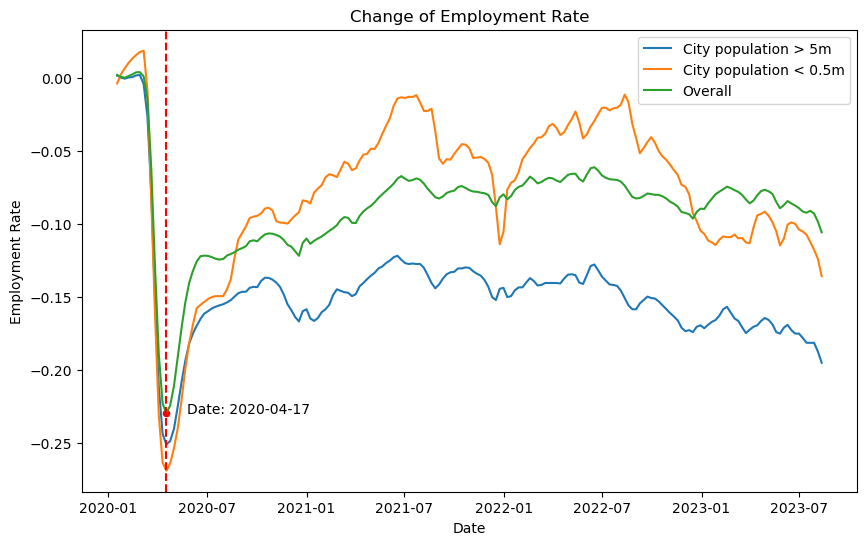

In [10]:
#Draw line plot of the Change of Employment Rate
plt.figure(figsize=(10, 6))
plt.plot(large_city_employment_rate_change['date'], large_city_employment_rate_change['emp'], label='City population > 5m')
plt.plot(small_city_employment_rate_change['date'], small_city_employment_rate_change['emp'], label='City population < 0.5m')
plt.plot(employment_rate_change['date'], employment_rate_change['emp'], label='Overall') 

peak_value = min(employment_rate_change['emp'])
peak_date = employment_rate_change.loc[employment_rate_change['emp'] == peak_value, 'date'].values[0]
print(str(peak_date)[:10])

print('min value of large city: ', min(large_city_employment_rate_change['emp']))
print('min value of overall: ', min(employment_rate_change['emp']))
print('min value of small city: ', min(small_city_employment_rate_change['emp']))

plt.axvline(x=peak_date, color='red', linestyle='--')
plt.scatter(peak_date, peak_value, color='red', s=20)
plt.annotate(f'Date: {str(peak_date)[:10]}', (peak_date, peak_value),textcoords="offset points", xytext=(15, 0), ha='left')

plt.title('Change of Employment Rate')
plt.xlabel('Date')
plt.ylabel('Employment Rate')

# Show the plot
plt.legend()
plt.show()

In [11]:
covid

,year,month,day,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,...,new_death_rate,death_rate,new_test_rate,test_rate,new_vaccine_rate,vaccine_rate,new_fullvaccine_rate,fullvaccine_rate,new_booster_first_rate,booster_first_rate
0,2020,1,1,1,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
1,2020,1,1,2,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,2020,1,1,3,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,2020,1,1,4,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,2020,1,1,5,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64679,2023,6,1,2,2736550,45257,190,0,.,.,...,0,543,.,.,.,.,.,.,.,.
64680,2023,6,2,2,2736745,45258,195,0,.,.,...,0,543,.,.,.,.,.,.,.,.
64681,2023,6,3,2,2736944,45259,199,0,.,.,...,0,543,.,.,.,.,.,.,.,.
64682,2023,6,4,2,2737141,45260,197,0,.,.,...,0,543,.,.,.,.,.,.,.,.


In [12]:
#Clean up the data set of Covid, remove empty row and sort it by population
covid=covid.drop(covid[covid.new_case_count == '.'].index)
covid['date'] = pd.to_datetime(covid[['year', 'month', 'day']])
covid_emp=covid.merge(employment, left_on=['date','cityid'], right_on = ['date','cityid'])

covid_emp=covid_emp.merge(geoIDs, left_on=['cityid'], right_on = ['cityid'])
covid_emp.sort_values(by='city_pop2019')
covid_emp

,year,month,day,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,...,emp_incmiddle,emp_incbelowmed,emp_incabovemed,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
0,2020,1,31,1,1,0,0,.,.,.,...,.00365,.00199,-.0000295,Los Angeles,CA,California,6,34.05,-118.24,10039107
1,2020,2,7,1,1,0,0,.,.,.,...,.00562,.00179,.00159,Los Angeles,CA,California,6,34.05,-118.24,10039107
2,2020,2,14,1,1,0,0,.,.,.,...,.00645,-.00068,.00555,Los Angeles,CA,California,6,34.05,-118.24,10039107
3,2020,2,21,1,1,0,0,.,.,.,...,.00704,-.00367,.0101,Los Angeles,CA,California,6,34.05,-118.24,10039107
4,2020,2,28,1,1,0,0,.,.,.,...,.00482,-.00769,.0103,Los Angeles,CA,California,6,34.05,-118.24,10039107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8569,2023,3,31,49,161739,1140,238,0,361743,13,...,.067,-.047,.,Boise,ID,Idaho,16,43.62,-116.20,481587
8570,2023,4,7,49,161275,1140,212,0,361819,11,...,.0932,-.029,.,Boise,ID,Idaho,16,43.62,-116.20,481587
8571,2023,4,14,49,161063,1140,151,0,361913,13,...,.111,-.018,.,Boise,ID,Idaho,16,43.62,-116.20,481587
8572,2023,4,21,49,160912,1140,139,0,362006,13,...,.113,-.0191,.,Boise,ID,Idaho,16,43.62,-116.20,481587


In [13]:
#Select the row by the date value 2020-04-17, located the min. value of employment rate
top_city=covid_emp.loc[covid_emp['date'] == '2020-04-17']
top_city=top_city.sort_values(by='city_pop2019', ascending=False )
top_city

,year,month,day,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,...,emp_incmiddle,emp_incbelowmed,emp_incabovemed,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
11,2020,4,17,1,10039,370,2961,254,.,.,...,-.251,-.29,-.182,Los Angeles,CA,California,6,34.05,-118.24,10039107
1858,2020,4,17,2,131363,12733,25067,4529,.,.,...,-.387,-.445,-.261,New York City,NY,New York,36,40.71,-74.01,8336817
181,2020,4,17,3,16369,596,6919,362,.,.,...,-.197,-.277,-.121,Chicago,IL,Illinois,17,41.88,-87.63,5150233
2028,2020,4,17,4,3958,53,1199,27,.,.,...,-.151,-.227,-.113,Houston,TX,Texas,48,29.76,-95.37,4713325
351,2020,4,17,5,2106,56,663,28,.,.,...,-.163,-.233,-.128,Phoenix,AZ,Arizona,4,33.45,-112.07,4485414
1026,2020,4,17,6,1943,55,462,26,.,.,...,-.235,-.298,-.149,San Diego,CA,California,6,32.72,-117.16,3338330
5800,2020,4,17,38,7742,139,2524,111,.,.,...,-.181,-.249,-.116,Miami,FL,Florida,12,25.76,-80.19,2716940
3182,2020,4,17,7,1897,40,653,30,.,.,...,-.179,-.283,-.11,Dallas,TX,Texas,48,32.78,-96.80,2635516
2193,2020,4,17,8,2494,109,594,49,.,.,...,-.276,-.44,-.184,Las Vegas,NV,Nevada,32,36.17,-115.14,2266715
2358,2020,4,17,9,4611,307,785,54,.,.,...,-.325,-.378,-.229,Seattle,WA,Washington,53,47.61,-122.33,2252782


In [14]:
#Choose 3 city representing the big city
top_city = top_city.iloc[0:3]
top_city

,year,month,day,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,...,emp_incmiddle,emp_incbelowmed,emp_incabovemed,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
11,2020,4,17,1,10039,370,2961,254,.,.,...,-.251,-.29,-.182,Los Angeles,CA,California,6,34.05,-118.24,10039107
1858,2020,4,17,2,131363,12733,25067,4529,.,.,...,-.387,-.445,-.261,New York City,NY,New York,36,40.71,-74.01,8336817
181,2020,4,17,3,16369,596,6919,362,.,.,...,-.197,-.277,-.121,Chicago,IL,Illinois,17,41.88,-87.63,5150233


In [15]:
#Calculate the infection rate
ratio_top=[{'city':row['cityname'],'infection rate':float(row['case_count'])/float(row['city_pop2019']),'emp rate':row['emp'],'new case count':row['new_case_count']} for index,row in top_city.iterrows()]
ratio_top

[{'city': 'Los Angeles',
  'infection rate': 0.0009999893416814862,
  'emp rate': -0.232,
  'new case count': '2961'},
 {'city': 'New York City',
  'infection rate': 0.015756972955025882,
  'emp rate': -0.327,
  'new case count': '25067'},
 {'city': 'Chicago',
  'infection rate': 0.003178302806882718,
  'emp rate': -0.195,
  'new case count': '6919'}]

In [16]:
#Choose 3 city from the bottom representing the small population city
bot_city = top_city.iloc[-3:]
bot_city

,year,month,day,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,...,emp_incmiddle,emp_incbelowmed,emp_incabovemed,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
11,2020,4,17,1,10039,370,2961,254,.,.,...,-.251,-.29,-.182,Los Angeles,CA,California,6,34.05,-118.24,10039107
1858,2020,4,17,2,131363,12733,25067,4529,.,.,...,-.387,-.445,-.261,New York City,NY,New York,36,40.71,-74.01,8336817
181,2020,4,17,3,16369,596,6919,362,.,.,...,-.197,-.277,-.121,Chicago,IL,Illinois,17,41.88,-87.63,5150233


In [17]:
#Calculate the infection rate
ratio_bot=[{'city':row['cityname'],'infection rate':float(row['case_count'])/float(row['city_pop2019']),'emp rate':row['emp'],'new case count':row['new_case_count']} for index,row in bot_city.iterrows()]
ratio_bot

[{'city': 'Los Angeles',
  'infection rate': 0.0009999893416814862,
  'emp rate': -0.232,
  'new case count': '2961'},
 {'city': 'New York City',
  'infection rate': 0.015756972955025882,
  'emp rate': -0.327,
  'new case count': '25067'},
 {'city': 'Chicago',
  'infection rate': 0.003178302806882718,
  'emp rate': -0.195,
  'new case count': '6919'}]

In [122]:
#Combine the result
ratio=ratio_top+ratio_bot
ratio

[{'city': 'Los Angeles',
  'infection rate': 0.0009999893416814862,
  'emp rate': -0.232,
  'new case count': '2961'},
 {'city': 'New York City',
  'infection rate': 0.015756972955025882,
  'emp rate': -0.327,
  'new case count': '25067'},
 {'city': 'Chicago',
  'infection rate': 0.003178302806882718,
  'emp rate': -0.195,
  'new case count': '6919'},
 {'city': 'Los Angeles',
  'infection rate': 0.0009999893416814862,
  'emp rate': -0.232,
  'new case count': '2961'},
 {'city': 'New York City',
  'infection rate': 0.015756972955025882,
  'emp rate': -0.327,
  'new case count': '25067'},
 {'city': 'Chicago',
  'infection rate': 0.003178302806882718,
  'emp rate': -0.195,
  'new case count': '6919'}]

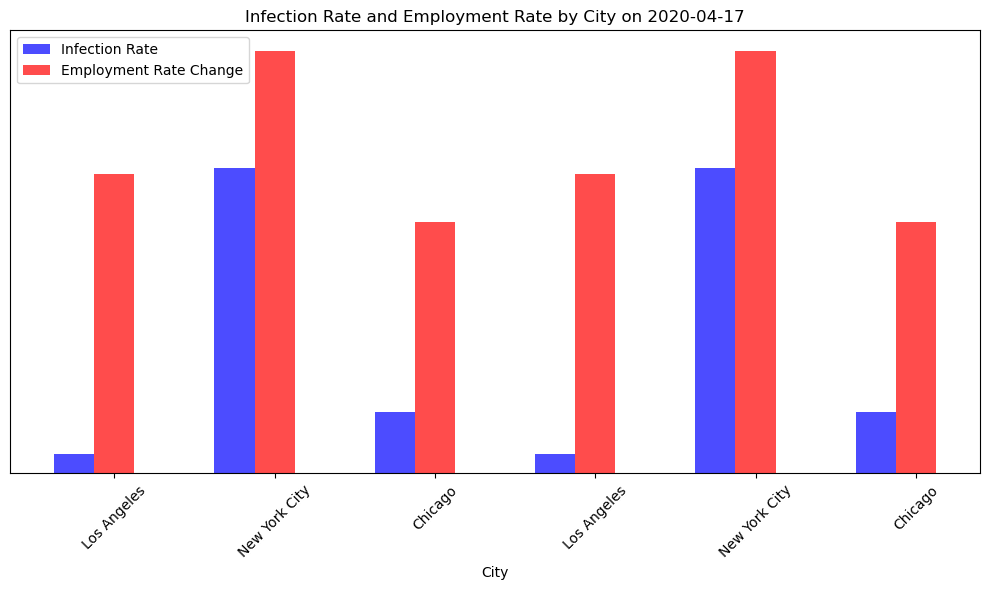

In [19]:
#Draw a bar chart for the infection rate and employment rate
cities = [item['city'] for item in ratio]
infection_rates = [item['infection rate']*15 for item in ratio]
emp_rates = [abs(item['emp rate']) for item in ratio]
#new_case = [int(item['new case count']) for item in ratio]
#print(new_case)

x = np.arange(len(cities))
width = 0.25

# Create a bar chart for infection rate
plt.figure(figsize=(10, 6))
plt.bar(x - width, infection_rates, width, label='Infection Rate', color='b', alpha=0.7)

# Create a bar chart for employment rate
plt.bar(x , emp_rates, width, label='Employment Rate Change', color='r', alpha=0.7)

plt.xlabel('City')
plt.title('Infection Rate and Employment Rate by City on 2020-04-17')
plt.xticks(x, cities, rotation=45)
plt.legend()

plt.gca().axes.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

In [20]:
geoIDs

,cityid,cityname,stateabbrev,statename,statefips,lat,lon,city_pop2019
0,1,Los Angeles,CA,California,6,34.05,-118.24,10039107
1,2,New York City,NY,New York,36,40.71,-74.01,8336817
2,3,Chicago,IL,Illinois,17,41.88,-87.63,5150233
3,4,Houston,TX,Texas,48,29.76,-95.37,4713325
4,5,Phoenix,AZ,Arizona,4,33.45,-112.07,4485414
5,6,San Diego,CA,California,6,32.72,-117.16,3338330
6,7,Dallas,TX,Texas,48,32.78,-96.80,2635516
7,8,Las Vegas,NV,Nevada,32,36.17,-115.14,2266715
8,9,Seattle,WA,Washington,53,47.61,-122.33,2252782
9,10,Fort Worth,TX,Texas,48,32.76,-97.33,2102515


In [21]:
covid['date'] = pd.to_datetime(covid[['year', 'month', 'day']])
covid=covid.drop(columns=['day'])

covid

,year,month,cityid,case_count,death_count,new_case_count,new_death_count,vaccine_count,new_vaccine_count,fullvaccine_count,...,death_rate,new_test_rate,test_rate,new_vaccine_rate,vaccine_rate,new_fullvaccine_rate,fullvaccine_rate,new_booster_first_rate,booster_first_rate,date
954,2020,1,3,1,0,0,.,.,.,.,...,0,.,.,.,.,.,.,.,.,2020-01-25
1007,2020,1,3,1,0,0,.,.,.,.,...,0,.,.,.,.,.,.,.,.,2020-01-26
1058,2020,1,1,1,0,0,.,.,.,.,...,0,.,.,.,.,.,.,.,.,2020-01-27
1060,2020,1,3,1,0,0,.,.,.,.,...,0,.,.,.,.,.,.,.,.,2020-01-27
1062,2020,1,5,1,0,0,.,.,.,.,...,0,.,.,.,.,.,.,.,.,2020-01-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64679,2023,6,2,2736550,45257,190,0,.,.,.,...,543,.,.,.,.,.,.,.,.,2023-06-01
64680,2023,6,2,2736745,45258,195,0,.,.,.,...,543,.,.,.,.,.,.,.,.,2023-06-02
64681,2023,6,2,2736944,45259,199,0,.,.,.,...,543,.,.,.,.,.,.,.,.,2023-06-03
64682,2023,6,2,2737141,45260,197,0,.,.,.,...,543,.,.,.,.,.,.,.,.,2023-06-04


In [22]:
#Covid data set pre-process
covid=covid[['date','cityid','case_count','new_case_count']]
covid=covid.drop(covid[covid.new_case_count == '.'].index)
covid

,date,cityid,case_count,new_case_count
954,2020-01-25,3,1,0
1007,2020-01-26,3,1,0
1058,2020-01-27,1,1,0
1060,2020-01-27,3,1,0
1062,2020-01-27,5,1,0
...,...,...,...,...
64679,2023-06-01,2,2736550,190
64680,2023-06-02,2,2736745,195
64681,2023-06-03,2,2736944,199
64682,2023-06-04,2,2737141,197


In [23]:
covid=covid.drop(covid[covid.new_case_count == '.'].index)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(covid)

In [24]:
covid['new_case_count']= [int(x) for x in covid['new_case_count']]
covid_case_per_day=covid.groupby(['date'])['new_case_count'].sum().reset_index()
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(covid_case_per_day)

In [25]:
covid_case_per_day

,date,new_case_count
0,2020-01-25,0
1,2020-01-26,0
2,2020-01-27,0
3,2020-01-28,0
4,2020-01-29,0
...,...,...
1223,2023-06-01,190
1224,2023-06-02,195
1225,2023-06-03,199
1226,2023-06-04,197


In [26]:
#Consumer spending data set pre-process
consumer_spending
consumer_spending['date'] = pd.to_datetime(consumer_spending[['year', 'month', 'day']])
consumer_spending=consumer_spending.drop(columns=['year','month', 'day'])


In [27]:
consumer_spending=consumer_spending[['date','cityid','spend_all']]
consumer_spending=consumer_spending.drop(consumer_spending[consumer_spending.spend_all == '.'].index)

In [28]:
consumer_spending['spend_all']=[float(spd) for spd in consumer_spending['spend_all']]
consumer_spending_by_day=consumer_spending.groupby(['date'])['spend_all'].mean().reset_index()
consumer_spending_by_day

,date,spend_all
0,2020-01-13,0.001134
1,2020-01-14,-0.009896
2,2020-01-15,-0.009414
3,2020-01-16,-0.017062
4,2020-01-17,-0.021166
...,...,...
941,2023-09-17,0.155013
942,2023-09-24,0.154160
943,2023-10-01,0.132858
944,2023-10-08,0.194251


In [29]:
#Drop two column from the dataset due to lacking of values
mobility=mobility.drop(columns=['gps_transit_stations','gps_transit_stations'])
mobility

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_workplaces,gps_residential,gps_away_from_home
0,2020,2,24,1,0.00571,-0.00286,.0714,0.0214,-0.00143,0.000625
1,2020,2,24,2,0.02000,-0.02410,.139,-0.0326,0.01160,-0.009070
2,2020,2,24,3,0.04000,0.02710,.281,0.0257,-0.00857,0.014700
3,2020,2,24,4,0.02140,-0.00714,.00286,0.0229,0.00286,-0.002060
4,2020,2,24,5,0.03290,-0.00143,.0386,0.0100,0.00286,-0.004610
...,...,...,...,...,...,...,...,...,...,...
51140,2022,10,15,49,-0.10100,-0.02000,.,-0.2400,0.02290,-0.021800
51141,2022,10,15,50,-0.11400,-0.07290,.419,-0.2630,0.02570,-0.024700
51142,2022,10,15,51,-0.13000,-0.04860,.33,-0.2870,0.03140,-0.031500
51143,2022,10,15,52,-0.09860,-0.07710,.316,-0.1990,0.02140,-0.020200


In [30]:
#Convert it to another dataframe
mobility['date'] = pd.to_datetime(mobility[['year', 'month', 'day']])
mblt_col=["date","cityid","gps_retail_and_recreation","gps_grocery_and_pharmacy","gps_workplaces","gps_residential","gps_away_from_home"]
mobile = mobility[mblt_col]
mobile = mobile.groupby(['date'])['gps_retail_and_recreation','gps_grocery_and_pharmacy','gps_workplaces','gps_residential',"gps_away_from_home"].mean().reset_index()

C:\Users\claio\AppData\Local\Temp\ipykernel_8072\3018456002.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mobile = mobile.groupby(['date'])['gps_retail_and_recreation','gps_grocery_and_pharmacy','gps_workplaces','gps_residential',"gps_away_from_home"].mean().reset_index()


In [31]:
mobile

,date,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_workplaces,gps_residential,gps_away_from_home
0,2020-02-24,0.026122,0.010062,0.010062,0.001352,0.000232
1,2020-02-25,0.033874,0.014156,0.012498,0.000311,0.001249
2,2020-02-26,0.042136,0.019076,0.013270,-0.000681,0.002361
3,2020-02-27,0.052115,0.025338,0.015764,-0.002945,0.004640
4,2020-02-28,0.060467,0.033913,0.018789,-0.005526,0.007135
...,...,...,...,...,...,...
960,2022-10-11,-0.152111,-0.092559,-0.249057,0.037117,-0.040075
961,2022-10-12,-0.155723,-0.096561,-0.248472,0.037047,-0.040006
962,2022-10-13,-0.158542,-0.099121,-0.250857,0.037917,-0.040870
963,2022-10-14,-0.158493,-0.098971,-0.251472,0.038489,-0.041415


In [32]:
consumer_spending_by_day

,date,spend_all
0,2020-01-13,0.001134
1,2020-01-14,-0.009896
2,2020-01-15,-0.009414
3,2020-01-16,-0.017062
4,2020-01-17,-0.021166
...,...,...
941,2023-09-17,0.155013
942,2023-09-24,0.154160
943,2023-10-01,0.132858
944,2023-10-08,0.194251


In [33]:
#Use linear method to interpolate data between value on date column, which use to increase the data size by joining other dataset
#The result of the interpolated data will compare with the result of small size data, to determind the value whether effected significantly by interpolation
date_range = pd.date_range(start=consumer_spending_by_day['date'].iloc[0], end=consumer_spending_by_day['date'].iloc[-1], freq='D')

new_df = pd.DataFrame({'date': date_range})

consumer_merged_df = pd.merge(new_df, consumer_spending_by_day, on='date', how='left')

consumer_merged_df['spend_all'].interpolate(method='linear', inplace=True)

consumer_merged_df = consumer_merged_df.reset_index(drop=True)

consumer_merged_df

,date,spend_all
0,2020-01-13,0.001134
1,2020-01-14,-0.009896
2,2020-01-15,-0.009414
3,2020-01-16,-0.017062
4,2020-01-17,-0.021166
...,...,...
1367,2023-10-11,0.183831
1368,2023-10-12,0.180358
1369,2023-10-13,0.176885
1370,2023-10-14,0.173412


In [34]:
covid_case_per_day

,date,new_case_count
0,2020-01-25,0
1,2020-01-26,0
2,2020-01-27,0
3,2020-01-28,0
4,2020-01-29,0
...,...,...
1223,2023-06-01,190
1224,2023-06-02,195
1225,2023-06-03,199
1226,2023-06-04,197


In [35]:
#Combine 4 datasets
combine_df = mobile.merge(consumer_merged_df,left_on=['date'], right_on = ['date'])
combine_df = combine_df.merge(covid_case_per_day,left_on=['date'], right_on = ['date'])
combine_df

,date,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_workplaces,gps_residential,gps_away_from_home,spend_all,new_case_count
0,2020-02-24,0.026122,0.010062,0.010062,0.001352,0.000232,-0.022519,11
1,2020-02-25,0.033874,0.014156,0.012498,0.000311,0.001249,-0.025104,12
2,2020-02-26,0.042136,0.019076,0.013270,-0.000681,0.002361,-0.029255,15
3,2020-02-27,0.052115,0.025338,0.015764,-0.002945,0.004640,-0.027846,13
4,2020-02-28,0.060467,0.033913,0.018789,-0.005526,0.007135,-0.031179,13
...,...,...,...,...,...,...,...,...
960,2022-10-11,-0.152111,-0.092559,-0.249057,0.037117,-0.040075,0.145423,68201
961,2022-10-12,-0.155723,-0.096561,-0.248472,0.037047,-0.040006,0.141856,66982
962,2022-10-13,-0.158542,-0.099121,-0.250857,0.037917,-0.040870,0.138289,65422
963,2022-10-14,-0.158493,-0.098971,-0.251472,0.038489,-0.041415,0.134721,59426


Text(0.5, 1.0, 'Correlation Heatmap')

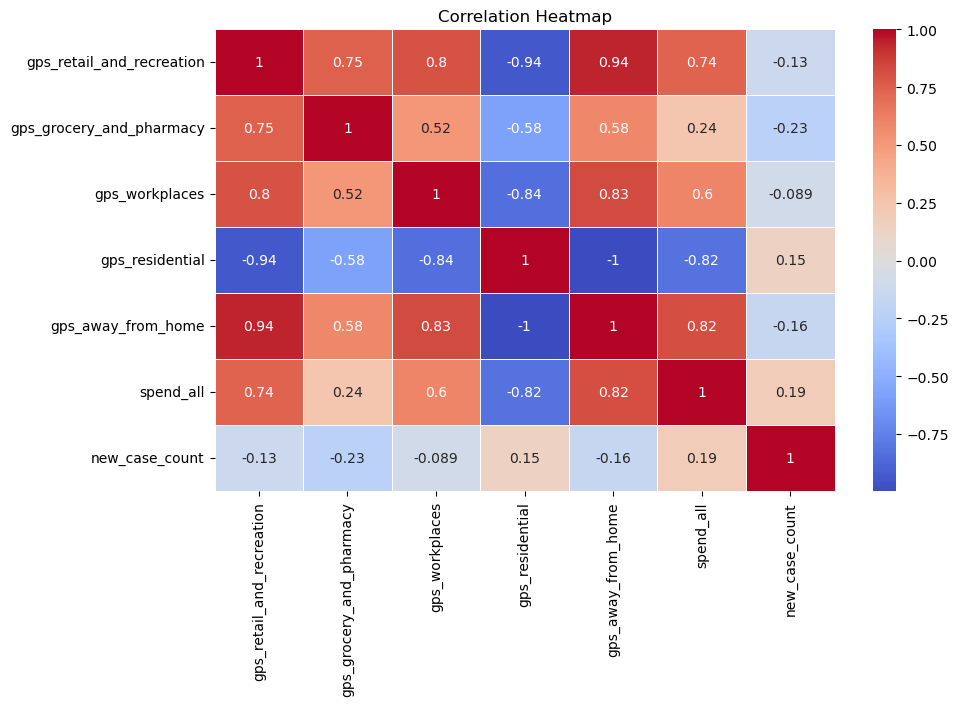

In [36]:
#Combine all feature
heatmap_df=combine_df.drop(columns=['date'])
heatmap_df

correlation_matrix = heatmap_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

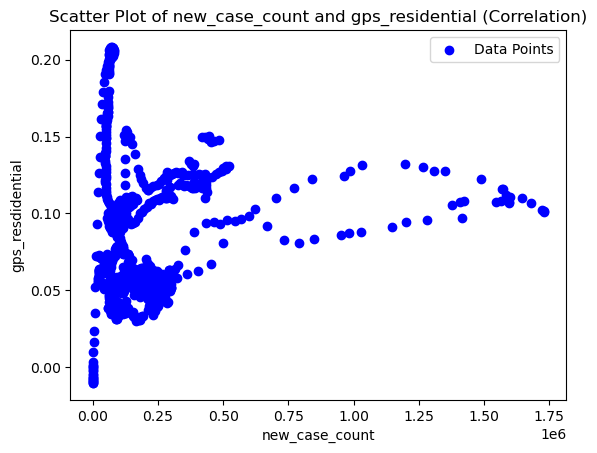

In [37]:
#Scatter Plot represent the correlation of new covid case and residential info
plt.scatter(combine_df["new_case_count"], combine_df["gps_residential"], c='blue', marker='o', label='Data Points')

plt.xlabel('new_case_count')
plt.ylabel('gps_resdidential')
plt.title('Scatter Plot of new_case_count and gps_residential (Correlation)')

plt.legend()

plt.show()

In [38]:
#econ_small_bussiness pre-process
econ_small_bussiness['day']=econ_small_bussiness['day_endofweek']
econ_small_bussiness['date'] = pd.to_datetime(econ_small_bussiness[['year', 'month', 'day']])
econ_small_bussiness['date'] = econ_small_bussiness['date'] - pd.DateOffset(days=2)
sm_business_col=['date','cityid','merchants_all','revenue_all']
econ_small_bussiness = econ_small_bussiness[sm_business_col]
econ_small_bussiness
sm_b_df=econ_small_bussiness.groupby(['date'])['merchants_all','revenue_all'].mean().reset_index()
sm_b_df

C:\Users\claio\AppData\Local\Temp\ipykernel_8072\167200411.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sm_b_df=econ_small_bussiness.groupby(['date'])['merchants_all','revenue_all'].mean().reset_index()


,date,merchants_all,revenue_all
0,2020-01-10,0.010253,-0.009718
1,2020-01-17,-0.003797,0.004772
2,2020-01-24,-0.004183,0.011522
3,2020-01-31,-0.002925,-0.003220
4,2020-02-07,-0.001004,0.005327
...,...,...,...
104,2022-01-07,0.042990,0.070065
105,2022-01-14,0.019200,0.051389
106,2022-01-21,0.014133,0.055417
107,2022-01-28,0.011552,-0.015517


In [39]:
#Date interpolation of small bussiness
date_range = pd.date_range(start=sm_b_df['date'].iloc[0], end=sm_b_df['date'].iloc[-1], freq='D')

new_df = pd.DataFrame({'date': date_range})

merged_df = pd.merge(new_df, sm_b_df, on='date', how='left')

merged_df['merchants_all'].interpolate(method='linear', inplace=True)
merged_df['revenue_all'].interpolate(method='linear', inplace=True)

merged_df = merged_df.reset_index(drop=True)

merged_df

,date,merchants_all,revenue_all
0,2020-01-10,0.010253,-0.009718
1,2020-01-11,0.008246,-0.007648
2,2020-01-12,0.006239,-0.005578
3,2020-01-13,0.004232,-0.003508
4,2020-01-14,0.002225,-0.001438
...,...,...,...
752,2022-01-31,0.019036,0.027497
753,2022-02-01,0.021531,0.041835
754,2022-02-02,0.024026,0.056173
755,2022-02-03,0.026521,0.070511


In [84]:
#Employment rate data set combine with city info and count the mean value by date
emp_geo_df=employment_geoId
emp_geo_df=emp_geo_df.groupby(['date'])['emp'].mean().reset_index()

In [88]:
#Combine ALL data set at weekly basis
combine_emp_rev = combine_df.merge(sm_b_df,left_on=['date'], right_on = ['date'])
combine_emp_rev = combine_emp_rev.merge(emp_geo_df,left_on=['date'], right_on = ['date'])
combine_emp_rev

,date,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_workplaces,gps_residential,gps_away_from_home,spend_all,new_case_count,merchants_all,revenue_all,emp
0,2020-02-28,0.060467,0.033913,0.018789,-0.005526,0.007135,-0.031179,13,-0.008379,-0.043976,0.003801
1,2020-03-06,0.079988,0.075869,0.019321,-0.008590,0.012923,-0.008888,134,-0.019905,-0.017867,0.000961
2,2020-03-13,0.045159,0.123200,-0.027745,0.009696,-0.007560,-0.013149,2009,-0.027882,-0.133607,-0.014212
3,2020-03-20,-0.225755,0.101004,-0.262868,0.113747,-0.127530,-0.140427,20336,-0.087148,-0.344981,-0.061443
4,2020-03-27,-0.444208,-0.129394,-0.442283,0.185792,-0.222943,-0.319612,43157,-0.257717,-0.504264,-0.129640
...,...,...,...,...,...,...,...,...,...,...,...
97,2022-01-07,-0.267385,-0.133570,-0.357472,0.122181,-0.150521,0.095070,1490346,0.042990,0.070065,-0.083267
98,2022-01-14,-0.228806,-0.094809,-0.281623,0.102247,-0.124985,0.082719,1722563,0.019200,0.051389,-0.081131
99,2022-01-21,-0.242925,-0.128155,-0.312094,0.108049,-0.131419,0.125645,1424720,0.014133,0.055417,-0.076905
100,2022-01-28,-0.225234,-0.121674,-0.254472,0.087849,-0.106957,0.052608,1028234,0.011552,-0.015517,-0.074794


Text(0.5, 1.0, 'Correlation Heatmap')

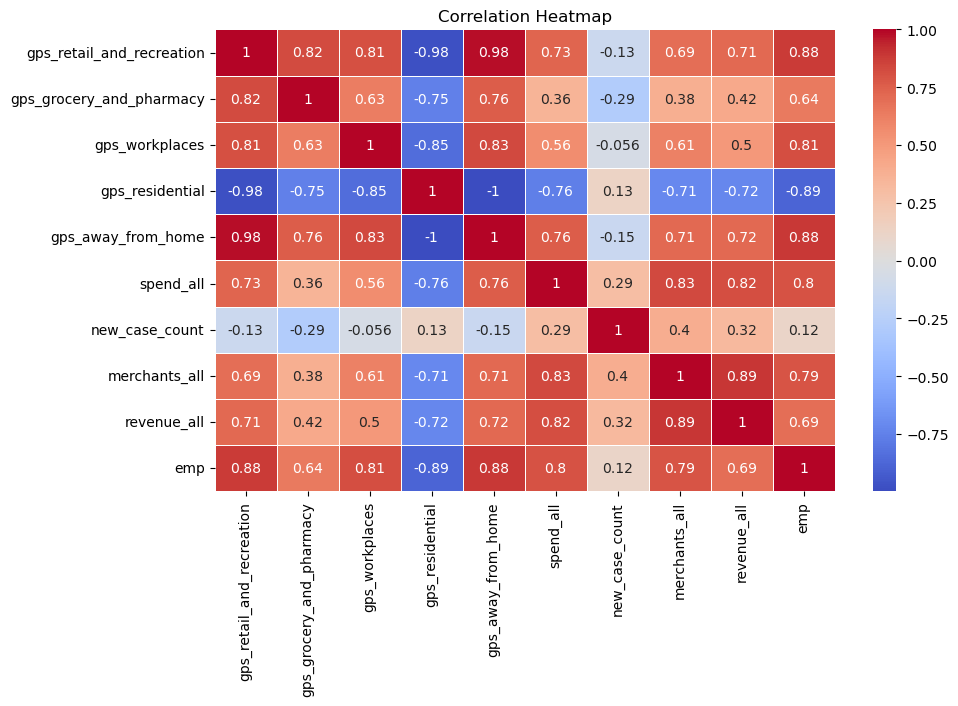

In [89]:
#Heatmap includes all the factor of analysis
heatmap_df_all=combine_emp_rev.drop(columns=['date'])
heatmap_df_all

correlation_matrix = heatmap_df_all.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

In [90]:
#Dataframe of employment and workplace spent time
emp_workplace=combine_emp_rev[["date","emp","gps_workplaces"]]
emp_workplace

,date,emp,gps_workplaces
0,2020-02-28,0.003801,0.018789
1,2020-03-06,0.000961,0.019321
2,2020-03-13,-0.014212,-0.027745
3,2020-03-20,-0.061443,-0.262868
4,2020-03-27,-0.129640,-0.442283
...,...,...,...
97,2022-01-07,-0.083267,-0.357472
98,2022-01-14,-0.081131,-0.281623
99,2022-01-21,-0.076905,-0.312094
100,2022-01-28,-0.074794,-0.254472


C:\Users\claio\AppData\Local\Temp\ipykernel_8072\4023128233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_workplace["difference"]=emp_workplace["emp"]-emp_workplace["gps_workplaces"]


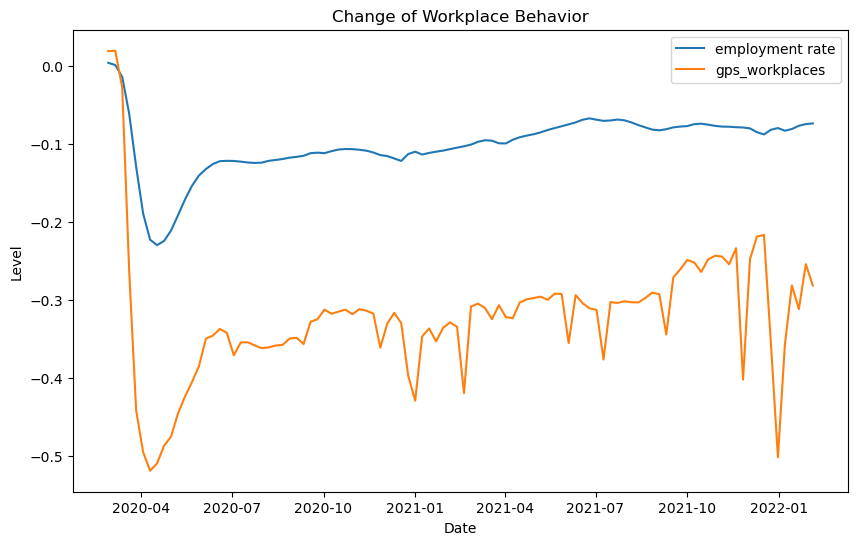

In [91]:
#Reveal the correlation of these two factors in detail 
emp_workplace["difference"]=emp_workplace["emp"]-emp_workplace["gps_workplaces"]

plt.figure(figsize=(10, 6))
plt.plot(emp_workplace['date'], emp_workplace['emp'], label='employment rate')
plt.plot(emp_workplace['date'], emp_workplace['gps_workplaces'], label='gps_workplaces')

plt.title('Change of Workplace Behavior')
plt.xlabel('Date')
plt.ylabel('Level')

# Show the plot
plt.legend()
plt.show()

In [92]:
employment_geoId
emp_df=employment_geoId[["emp","date","cityname"]]
emp_df=emp_geo_df.groupby(['date'])['emp'].mean().reset_index()
emp_df

,date,emp
0,2020-01-17,0.001482
1,2020-01-24,0.000732
2,2020-01-31,-0.000031
3,2020-02-07,0.001115
4,2020-02-14,0.002320
...,...,...
182,2023-07-14,-0.092503
183,2023-07-21,-0.091203
184,2023-07-28,-0.093081
185,2023-08-04,-0.098651


In [93]:
#Data interpolation of employment rate to daily basis
date_range = pd.date_range(start=emp_geo_df['date'].iloc[0], end=emp_geo_df['date'].iloc[-1], freq='D')

new_df = pd.DataFrame({'date': date_range})

emp_trend_df = pd.merge(new_df, emp_geo_df, on='date', how='left')

emp_trend_df['emp'].interpolate(method='linear', inplace=True)

emp_trend_df = emp_trend_df.reset_index(drop=True)

emp_trend_df

,date,emp
0,2020-01-17,0.001482
1,2020-01-18,0.001375
2,2020-01-19,0.001268
3,2020-01-20,0.001161
4,2020-01-21,0.001054
...,...,...
1298,2023-08-07,-0.101762
1299,2023-08-08,-0.102799
1300,2023-08-09,-0.103836
1301,2023-08-10,-0.104873


In [94]:
#Combine all the dataset in daily basis
combine_large = combine_df.merge(emp_trend_df,left_on=['date'], right_on = ['date'])
combine_large = combine_large.merge(merged_df,left_on=['date'], right_on = ['date'])
combine_large

,date,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_workplaces,gps_residential,gps_away_from_home,spend_all,new_case_count,emp,merchants_all,revenue_all
0,2020-02-24,0.026122,0.010062,0.010062,0.001352,0.000232,-0.022519,11,0.003754,-0.003779,-0.025773
1,2020-02-25,0.033874,0.014156,0.012498,0.000311,0.001249,-0.025104,12,0.003766,-0.004929,-0.030324
2,2020-02-26,0.042136,0.019076,0.013270,-0.000681,0.002361,-0.029255,15,0.003777,-0.006079,-0.034875
3,2020-02-27,0.052115,0.025338,0.015764,-0.002945,0.004640,-0.027846,13,0.003789,-0.007229,-0.039426
4,2020-02-28,0.060467,0.033913,0.018789,-0.005526,0.007135,-0.031179,13,0.003801,-0.008379,-0.043976
...,...,...,...,...,...,...,...,...,...,...,...
707,2022-01-31,-0.215987,-0.115928,-0.249868,0.083545,-0.100189,0.083429,848232,-0.074404,0.019036,0.027497
708,2022-02-01,-0.206025,-0.099810,-0.247394,0.080696,-0.097364,0.094303,790176,-0.074274,0.021531,0.041835
709,2022-02-02,-0.210221,-0.096995,-0.251811,0.082887,-0.099845,0.098208,732558,-0.074145,0.024026,0.056173
710,2022-02-03,-0.226774,-0.110306,-0.269019,0.091553,-0.108657,0.098088,668328,-0.074015,0.026521,0.070511


Text(0.5, 1.0, 'Correlation Heatmap Daily')

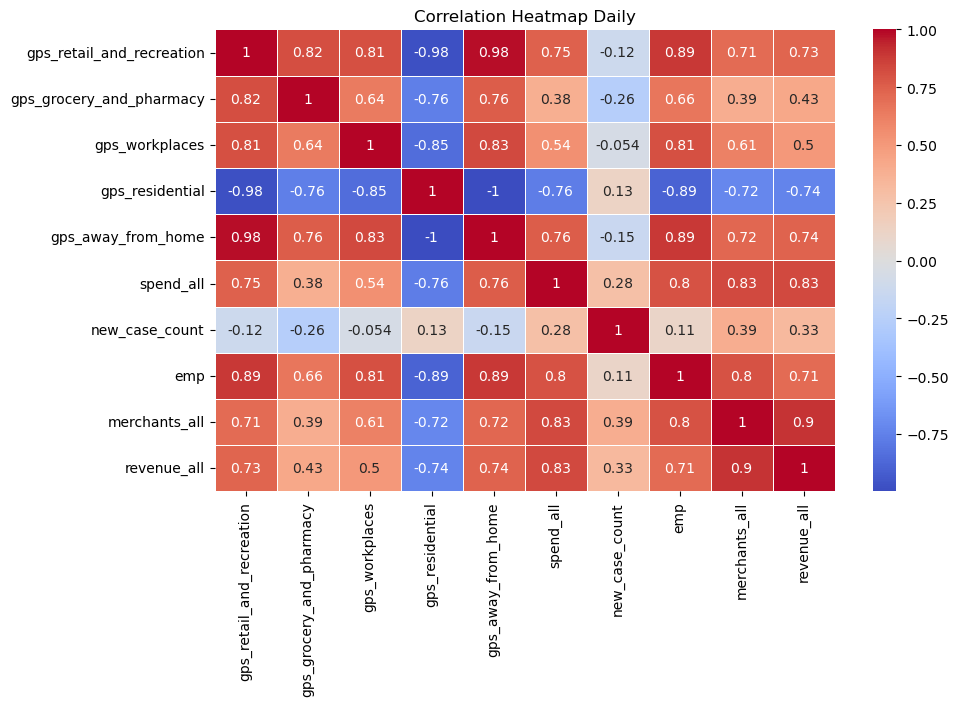

In [123]:
# Demostrate the daily basis heat map is not much different from the weekly basis
heatmap_df_all_daily=combine_large.drop(columns=['date'])
heatmap_df_all_daily

correlation_matrix = heatmap_df_all_daily.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Daily')

In [95]:
#combine the employment rate and spending
emp_spend=combine_large[["emp","spend_all"]]
emp_spend

,emp,spend_all
0,0.003754,-0.022519
1,0.003766,-0.025104
2,0.003777,-0.029255
3,0.003789,-0.027846
4,0.003801,-0.031179
...,...,...
707,-0.074404,0.083429
708,-0.074274,0.094303
709,-0.074145,0.098208
710,-0.074015,0.098088


<Figure size 1000x600 with 0 Axes>

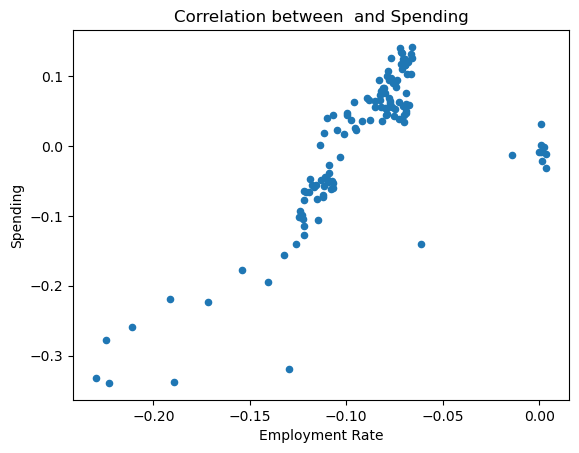

In [96]:
#Draw scatter plot to reveal the data distribution
plt.figure(figsize=(10, 6))
emp_spend=consumer_spending_by_day.merge(emp_geo_df,left_on=['date'], right_on = ['date'])
emp_spend.plot(kind='scatter', x="emp", y='spend_all')

plt.title('Correlation between  and Spending')
plt.xlabel('Employment Rate')
plt.ylabel('Spending')
plt.show()

In [97]:
#Use linear regression to predict the correlation
import sklearn.linear_model
model = sklearn.linear_model.LinearRegression()
X = np.c_[emp_spend["emp"]]
y = np.c_[emp_spend["spend_all"]]
# Train the model
model.fit(X, y)

LinearRegression()

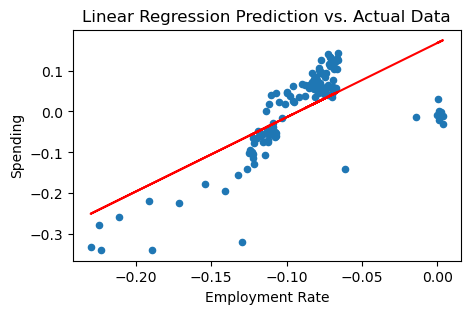

In [98]:
#Draw predicted line by intercept and coef value
intercept_value, coeffient = model.intercept_[0], model.coef_[0][0]
emp_spend.plot(kind='scatter', x="emp", y='spend_all', figsize=(5,3))

plt.title('Linear Regression Prediction vs. Actual Data')
plt.plot(X, intercept_value + coeffient*X, "r")
plt.xlabel('Employment Rate')
plt.ylabel('Spending')
plt.show()

In [99]:

print("Model Intercept", model.intercept_[0])
print("Model Coeffient:", model.coef_[0][0])

Model Intercept 0.16720764416969355
Model Coeffient: 1.8139710870460024


In [100]:
#Combine spending and small bussiness dataset to generate a 3 dimension dataset
spend_rev=consumer_spending_by_day.merge(sm_b_df,left_on=['date'], right_on = ['date'])
spend_rev

,date,spend_all,merchants_all,revenue_all
0,2020-01-17,-0.021166,-0.003797,0.004772
1,2020-01-24,0.030892,-0.004183,0.011522
2,2020-01-31,-0.008131,-0.002925,-0.003220
3,2020-02-07,0.000927,-0.001004,0.005327
4,2020-02-14,-0.002106,-0.002155,-0.006601
...,...,...,...,...
103,2022-01-07,0.095070,0.042990,0.070065
104,2022-01-14,0.082719,0.019200,0.051389
105,2022-01-21,0.125645,0.014133,0.055417
106,2022-01-28,0.052608,0.011552,-0.015517


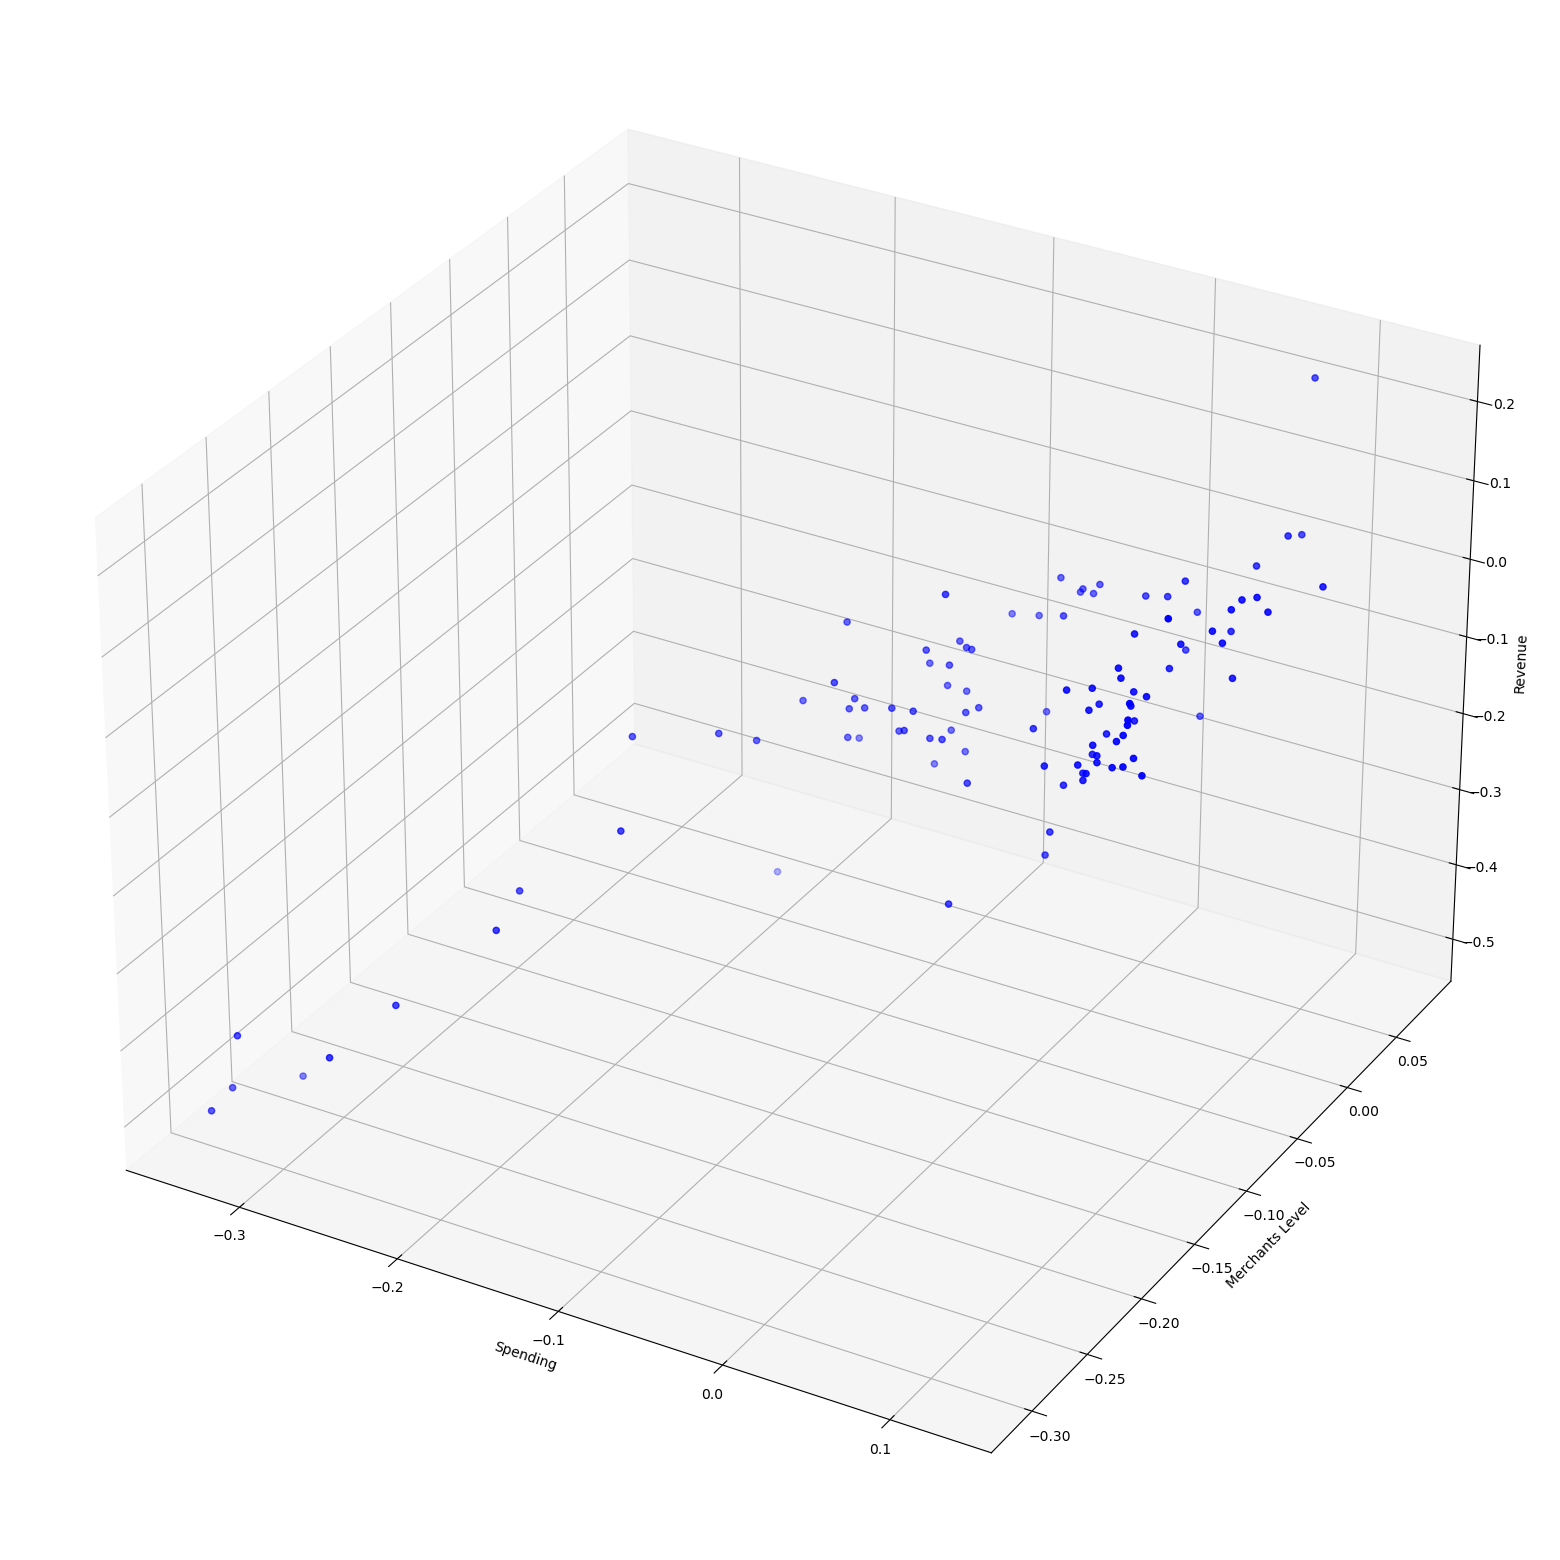

In [101]:
#Draw the data distribution in 3-d graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(spend_rev["spend_all"], spend_rev["merchants_all"], spend_rev["revenue_all"], c='b', marker='o')
ax.set_xlabel('Spending')
ax.set_ylabel('Merchants Level')
ax.set_zlabel('Revenue')

plt.show()


In [104]:
combine_large

,date,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_workplaces,gps_residential,gps_away_from_home,spend_all,new_case_count,emp,merchants_all,revenue_all
0,2020-02-24,0.026122,0.010062,0.010062,0.001352,0.000232,-0.022519,11,0.003754,-0.003779,-0.025773
1,2020-02-25,0.033874,0.014156,0.012498,0.000311,0.001249,-0.025104,12,0.003766,-0.004929,-0.030324
2,2020-02-26,0.042136,0.019076,0.013270,-0.000681,0.002361,-0.029255,15,0.003777,-0.006079,-0.034875
3,2020-02-27,0.052115,0.025338,0.015764,-0.002945,0.004640,-0.027846,13,0.003789,-0.007229,-0.039426
4,2020-02-28,0.060467,0.033913,0.018789,-0.005526,0.007135,-0.031179,13,0.003801,-0.008379,-0.043976
...,...,...,...,...,...,...,...,...,...,...,...
707,2022-01-31,-0.215987,-0.115928,-0.249868,0.083545,-0.100189,0.083429,848232,-0.074404,0.019036,0.027497
708,2022-02-01,-0.206025,-0.099810,-0.247394,0.080696,-0.097364,0.094303,790176,-0.074274,0.021531,0.041835
709,2022-02-02,-0.210221,-0.096995,-0.251811,0.082887,-0.099845,0.098208,732558,-0.074145,0.024026,0.056173
710,2022-02-03,-0.226774,-0.110306,-0.269019,0.091553,-0.108657,0.098088,668328,-0.074015,0.026521,0.070511


In [105]:
target=combine_large.values[:,-2:]
data=combine_large.values[:,1:-2]

In [106]:
target

array([[-0.00377911859838275, -0.025773396226415096],
       [-0.004929088948787063, -0.030324150943396227],
       [-0.006079059299191376, -0.03487490566037736],
       ...,
       [0.024026091644204856, 0.056173234501347716],
       [0.026520970350404315, 0.0705112398921833],
       [0.029015849056603777, 0.08484924528301888]], dtype=object)

In [107]:
data

array([[0.026121509433962263, 0.010061509433962265, 0.010061698113207548,
        ..., -0.02251877551020408, 11, 0.0037538598901098903],
       [0.03387377358490566, 0.01415566037735849, 0.012498301886792452,
        ..., -0.025103755102040815, 12, 0.0037656016483516483],
       [0.042136415094339616, 0.01907603773083019, 0.01326977358490566,
        ..., -0.029254693877551016, 15, 0.0037773434065934064],
       ...,
       [-0.21022075471698112, -0.0969945283018868, -0.25181132075471696,
        ..., 0.09820795918367348, 732558, -0.07414453296703297],
       [-0.22677358490566038, -0.11030566037735848, -0.2690188679245283,
        ..., 0.09808795918367347, 668328, -0.07401467032967034],
       [-0.2351509433962264, -0.12014528301886793, -0.28183018867924525,
        ..., 0.09516911020408163, 598116, -0.0738848076923077]],
      dtype=object)

In [108]:
#Pre-processing the multi-factor prediction
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(data, target, test_size = 0.3)

# X_train, X_test, Y_train, Y_test
#print(X_train)
print(X_test)
#print(Y_train)
#print(Y_test)

[[-0.4429056603773585 -0.16324150943396226 -0.4833584905660378 ...
  -0.27716734693877554 60567 -0.21895879120879122]
 [-0.2261452830188679 -0.05779283018867924 -0.3557547169811321 ...
  -0.10085102040816327 151555 -0.12342032967032968]
 [-0.2250698113207547 -0.0795688679245283 -0.3621698113207547 ...
  -0.10140530612244898 151897 -0.12425384615384615]
 ...
 [-0.36713207547169807 -0.08042339622641509 -0.44584905660377355 ...
  -0.21891836734693879 54222 -0.1916134615384615]
 [-0.2540377358490566 -0.1100766037735849 -0.3175471698113207 ...
  -0.041810204081632656 274750 -0.11088818681318681]
 [-0.11478415094339624 -0.03769471698113208 -0.27637735849056605 ...
  0.06025142857142857 190015 -0.07854052197802198]]


In [109]:
#Using linear regression model to predict 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [110]:
y_pred = model.predict(X_test)
y_pred

array([[-2.28620734e-01, -3.35422606e-01],
       [-1.03047548e-01, -1.40524616e-01],
       [-1.01474608e-01, -1.23745055e-01],
       [-6.26100522e-02, -1.38878245e-01],
       [-2.96602168e-02, -7.27424550e-03],
       [-1.00535791e-01, -1.34371244e-01],
       [-9.66923868e-02, -1.37998636e-01],
       [-2.37348044e-01, -3.21395487e-01],
       [-5.45794155e-02, -3.39883046e-02],
       [-1.01239156e-01, -1.33807706e-01],
       [-5.38739717e-02, -5.85642820e-02],
       [-1.64085866e-01, -2.62962744e-01],
       [-2.62080905e-01, -3.97137391e-01],
       [-4.49090278e-02, -4.91699651e-02],
       [-5.49549511e-02, -5.99658057e-02],
       [-9.23638008e-02, -1.10387214e-01],
       [-4.14040583e-02, -3.60762499e-02],
       [-8.14280683e-02, -1.18013160e-01],
       [-6.96186161e-02, -1.51451106e-01],
       [-7.45372978e-02, -1.14701976e-01],
       [-1.93878855e-01, -4.41671132e-01],
       [-6.20200960e-02, -1.13069550e-01],
       [ 1.70092283e-03,  3.47233501e-02],
       [-2.

In [111]:
#Calculate the mean squared error and r squared value 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.001658158620888309
R-squared: 0.8033854245671945


In [112]:
#Check the moblity dataset
mobility

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_workplaces,gps_residential,gps_away_from_home,date
0,2020,2,24,1,0.00571,-0.00286,.0714,0.0214,-0.00143,0.000625,2020-02-24
1,2020,2,24,2,0.02000,-0.02410,.139,-0.0326,0.01160,-0.009070,2020-02-24
2,2020,2,24,3,0.04000,0.02710,.281,0.0257,-0.00857,0.014700,2020-02-24
3,2020,2,24,4,0.02140,-0.00714,.00286,0.0229,0.00286,-0.002060,2020-02-24
4,2020,2,24,5,0.03290,-0.00143,.0386,0.0100,0.00286,-0.004610,2020-02-24
...,...,...,...,...,...,...,...,...,...,...,...
51140,2022,10,15,49,-0.10100,-0.02000,.,-0.2400,0.02290,-0.021800,2022-10-15
51141,2022,10,15,50,-0.11400,-0.07290,.419,-0.2630,0.02570,-0.024700,2022-10-15
51142,2022,10,15,51,-0.13000,-0.04860,.33,-0.2870,0.03140,-0.031500,2022-10-15
51143,2022,10,15,52,-0.09860,-0.07710,.316,-0.1990,0.02140,-0.020200,2022-10-15


In [113]:
#Cleaning dataset by removing empty values, and convert all value to numeric
kmean_mob_df = mobility
kmean_mob_df = kmean_mob_df.drop(kmean_mob_df[kmean_mob_df.gps_parks == '.'].index)
kmean_mob_df = kmean_mob_df.drop(kmean_mob_df[kmean_mob_df.gps_residential == '.'].index)
kmean_mob_df = kmean_mob_df.reset_index(drop=True)

In [114]:
kmean_mob_df["gps_parks"]=[float(x) for x in kmean_mob_df["gps_parks"]]
kmean_mob_df

,year,month,day,cityid,gps_retail_and_recreation,gps_grocery_and_pharmacy,gps_parks,gps_workplaces,gps_residential,gps_away_from_home,date
0,2020,2,24,1,0.00571,-0.00286,0.07140,0.0214,-0.00143,0.000625,2020-02-24
1,2020,2,24,2,0.02000,-0.02410,0.13900,-0.0326,0.01160,-0.009070,2020-02-24
2,2020,2,24,3,0.04000,0.02710,0.28100,0.0257,-0.00857,0.014700,2020-02-24
3,2020,2,24,4,0.02140,-0.00714,0.00286,0.0229,0.00286,-0.002060,2020-02-24
4,2020,2,24,5,0.03290,-0.00143,0.03860,0.0100,0.00286,-0.004610,2020-02-24
...,...,...,...,...,...,...,...,...,...,...,...
50798,2022,10,15,48,-0.21300,-0.18000,-0.23900,-0.3090,0.06140,-0.071600,2022-10-15
50799,2022,10,15,50,-0.11400,-0.07290,0.41900,-0.2630,0.02570,-0.024700,2022-10-15
50800,2022,10,15,51,-0.13000,-0.04860,0.33000,-0.2870,0.03140,-0.031500,2022-10-15
50801,2022,10,15,52,-0.09860,-0.07710,0.31600,-0.1990,0.02140,-0.020200,2022-10-15


In [118]:
#Select data for clustering
mobility_values=kmean_mob_df.values[:,4:-1]
mobility_values

array([[0.00571, -0.00286, 0.0714, 0.0214, -0.00143, 0.000625],
       [0.02, -0.0241, 0.139, -0.0326, 0.0116, -0.00907],
       [0.04, 0.0271, 0.281, 0.0257, -0.00857, 0.0147],
       ...,
       [-0.13, -0.0486, 0.33, -0.287, 0.0314, -0.0315],
       [-0.0986, -0.0771, 0.316, -0.199, 0.0214, -0.0202],
       [-0.00429, 0.00143, 0.38, -0.133, 0.02, -0.0215]], dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score: 0.7108765995910622


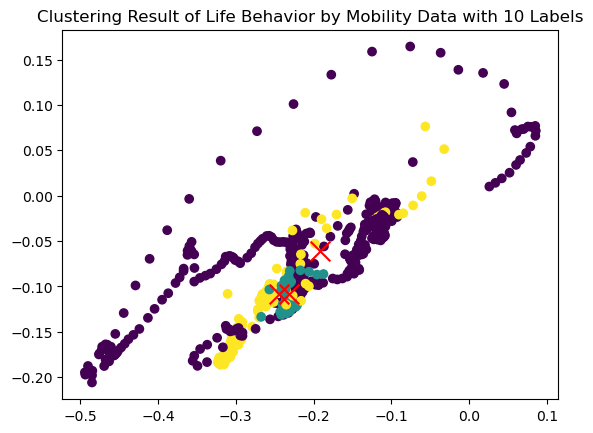

In [121]:
#Draw a clustering result by using 3 labels
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

kmeans = KMeans(n_clusters=3)

kmeans.fit(data)

labels = kmeans.labels_

silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)

# Visualize the data and cluster centers (as shown in the previous example)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
plt.title('Clustering Result of Life Behavior by Mobility Data with 10 Labels')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Silhouette Score: 0.5486270622481992


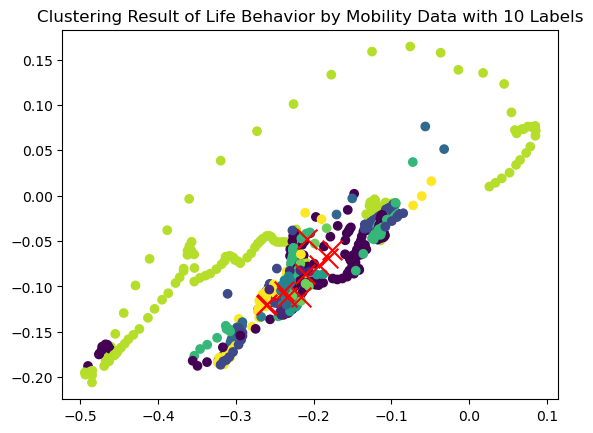

In [119]:
#Draw a clustering result by using 10 labels
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

kmeans = KMeans(n_clusters=10)

kmeans.fit(data)

labels = kmeans.labels_

silhouette_avg = silhouette_score(data, labels)
print("Silhouette Score:", silhouette_avg)

# Visualize the data and cluster centers (as shown in the previous example)
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red')
plt.title('Clustering Result of Life Behavior by Mobility Data with 10 Labels')
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

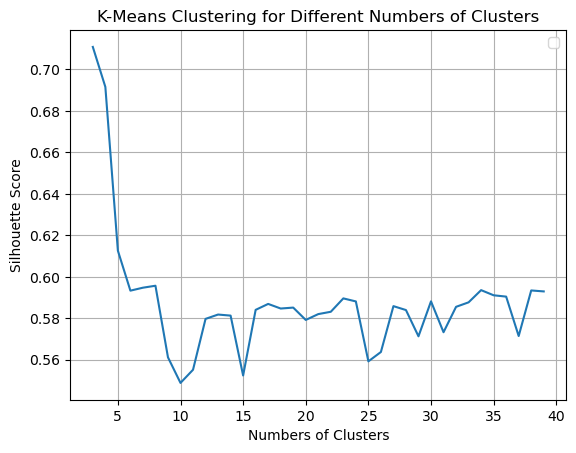

In [120]:
#Draw a line plot of the result of clustering by using 3-50 labels
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

silhouette_list=[]
number_clusters=[x for x in range(3,40)]

for i in number_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)

    labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(data, labels)
    silhouette_list.append(silhouette_avg)

plt.plot(number_clusters, silhouette_list) 

plt.title('K-Means Clustering for Different Numbers of Clusters')
plt.xlabel('Numbers of Clusters')
plt.ylabel('Silhouette Score')

# Show the plot
plt.grid()
plt.legend()
plt.show()
